# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syifa Arifah Nurbayani
- **Email:** syifaarifahnrb@gmail.com
- **ID Dicoding:** syifaarifah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda secara harian atau per jam?
- Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?
- Hari apa yang paling banyak dipakai untuk menyewa sepeda?
- Bagaimana pola jumlah pengguna casual dan registered di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memuat Tabel day_df

In [3]:
path="/content/drive/MyDrive/Bike-sharing-dataset/day.csv"
day_df=pd.read_csv(path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat Tabel hour_df

In [4]:
path="/content/drive/MyDrive/Bike-sharing-dataset/hour.csv"
hour_df=pd.read_csv(path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data diambil dari Google Drive, memastikan bahwa dataset tersimpan dengan baik dan dapat diakses dengan mudah.

### Assessing Data

Penilaian Tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Penilaian Tabel hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Ketidaksesuaian tipe data pada dteday ditemukan dalam day_df dan hour_df, yang dapat menghambat analisis berbasis waktu.

- Perlu dilakukan konversi ke format datetime agar dapat digunakan untuk analisis waktu lebih lanjut.

- Setelah diperbaiki, kita bisa lebih mudah mengidentifikasi pola penyewaan berdasarkan hari, bulan, dan musim.

### Cleaning Data

### Membersihkan Tabel day_df

Memperbaiki Tipe Data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Membersihkan Tabel hour_df

Memperbaiki Tipe Data

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
    print(f"Unique values in {col}: {day_df[col].unique()}")

Unique values in season: [1 2 3 4]
Unique values in yr: [0 1]
Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in holiday: [0 1]
Unique values in weekday: [6 0 1 2 3 4 5]
Unique values in workingday: [0 1]
Unique values in weathersit: [2 1 3]


In [18]:
day_df["weathersit"].value_counts()

,count
weathersit,
1,463
2,247
3,21


**Insight:**
- Setelah dilakukan perbaikan tipe data pada kolom dteday, kini data sudah sesuai dan siap digunakan untuk analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Mengelompokan data berdasarkan kondisi cuaca (weathersit)

In [20]:
day_df.groupby("weathersit")["cnt"].agg(["mean", "sum", "max", "min"]).reset_index()

,weathersit,mean,sum,max,min
0,1,4876.786177,2257952,8714,431
1,2,4035.862348,996858,8362,605
2,3,1803.285714,37869,4639,22


In [21]:
hour_df.groupby("weathersit")["cnt"].agg(["mean", "sum", "max", "min"]).reset_index()

,weathersit,mean,sum,max,min
0,1,204.869272,2338173,977,1
1,2,175.165493,795952,957,1
2,3,111.579281,158331,891,1
3,4,74.333333,223,164,23


Pengelompokkan data berdasarkan working day

In [22]:
day_df.groupby("workingday")["cnt"].agg(["mean", "sum", "max", "min"]).reset_index()

,workingday,mean,sum,max,min
0,0,4330.168831,1000269,8714,605
1,1,4584.820000,2292410,8362,22


In [23]:
hour_df.groupby("workingday")["cnt"].agg(["mean", "sum", "max", "min"]).reset_index()


,workingday,mean,sum,max,min
0,0,181.405332,1000269,783,1
1,1,193.207754,2292410,977,1


Pengelompokkan Data Hari (weekday) paling banyak untuk penyewaan

In [24]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung statistik penyewaan
weekday_rentals = day_df.groupby("weekday")["cnt"].agg(["mean", "sum", "max", "min"]).reset_index()

# Menampilkan hasil dengan urutan hari dari penyewaan terbanyak
weekday_rentals_sorted = weekday_rentals.sort_values(by="mean", ascending=False)

# Menampilkan hasil
weekday_rentals_sorted

,weekday,mean,sum,max,min
5,5,4690.288462,487790,8362,1167
4,4,4667.259615,485395,7804,431
6,6,4550.542857,477807,8714,627
3,3,4548.538462,473048,8173,441
2,2,4510.663462,469109,7767,683
1,1,4338.123810,455503,7525,22
0,0,4228.828571,444027,8227,605


Pengelompokan Pola Casual dan Registered Tiap Musim

In [25]:
day_df.groupby(by="season").agg({
    "casual": ["sum", "mean", "max", "min"],
    "registered": ["sum", "mean", "max", "min"],
})

casual                         registered                        
           sum         mean   max  min        sum         mean   max  min
season                                                                   
1        60622   334.928177  3155    9     410726  2269.204420  5315  416
2       203522  1106.097826  3410  120     715067  3886.233696  6456  674
3       226091  1202.611702  3160  118     835038  4441.691489  6917  889
4       129782   729.112360  3031    2     711831  3999.050562  6946   20

**Insight:**
- Saat cuaca cerah (1), sedikit berawan, atau sebagian berawan dari data perhari maupun perjam memiliki rata rata tertinggi untuk penyewaan sepeda
- Saat hari kerja (workingday = 1) jika dilihat dari data perhari dan perjam memiliki rata-rata paling banyak dibandingkan hari libur
- Dari 7 hari dalam seminggu hari jumat (5) adalah hari yang paling banyak dalam penyewaan sepeda
- Musim fall (3) memiliki nilai paling banyak diantara musim lainnya beradasarkan dari 2 kategori pengguna yaitu casual dan registered

## Visualization & Explanatory Analysis

### Pertanyaan 1:

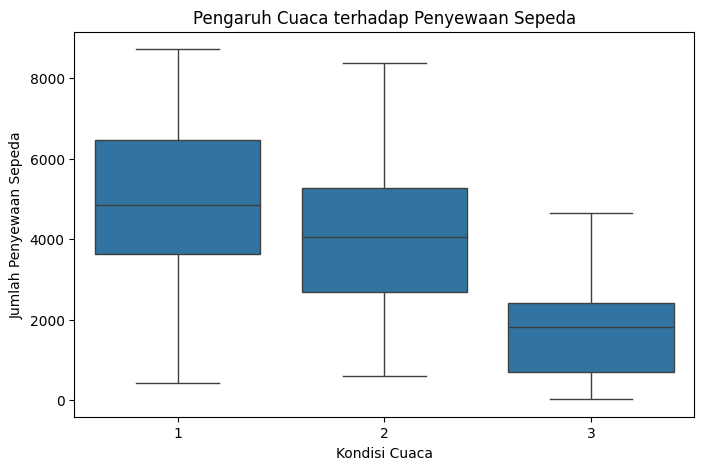

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.show()

### Pertanyaan 2:

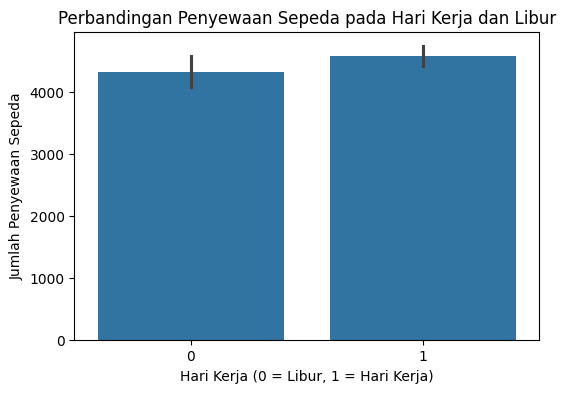

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x="workingday", y="cnt", data=day_df)
plt.xlabel("Hari Kerja (0 = Libur, 1 = Hari Kerja)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda pada Hari Kerja dan Libur")
plt.show()

### Pertanyaan 3:

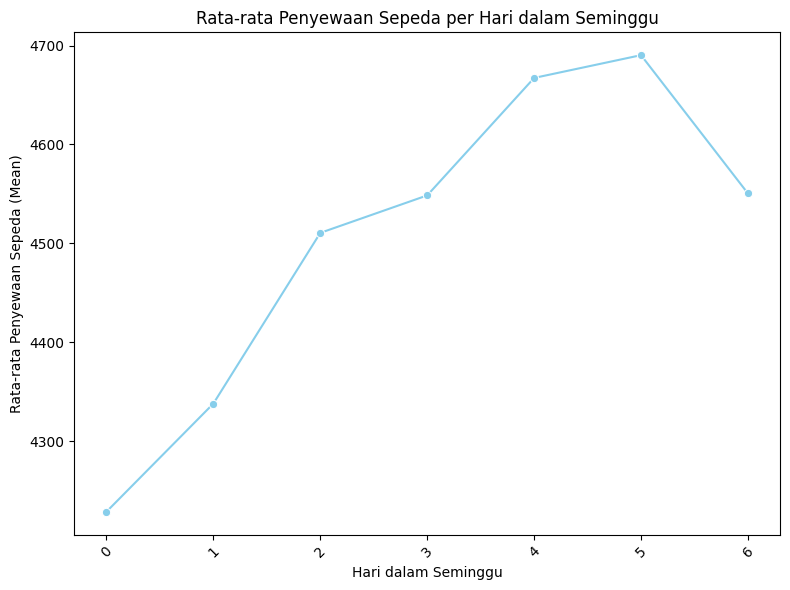

In [28]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="weekday", y="mean", data=weekday_rentals_sorted, marker='o', color='skyblue')
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan Sepeda (Mean)")
plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 4:

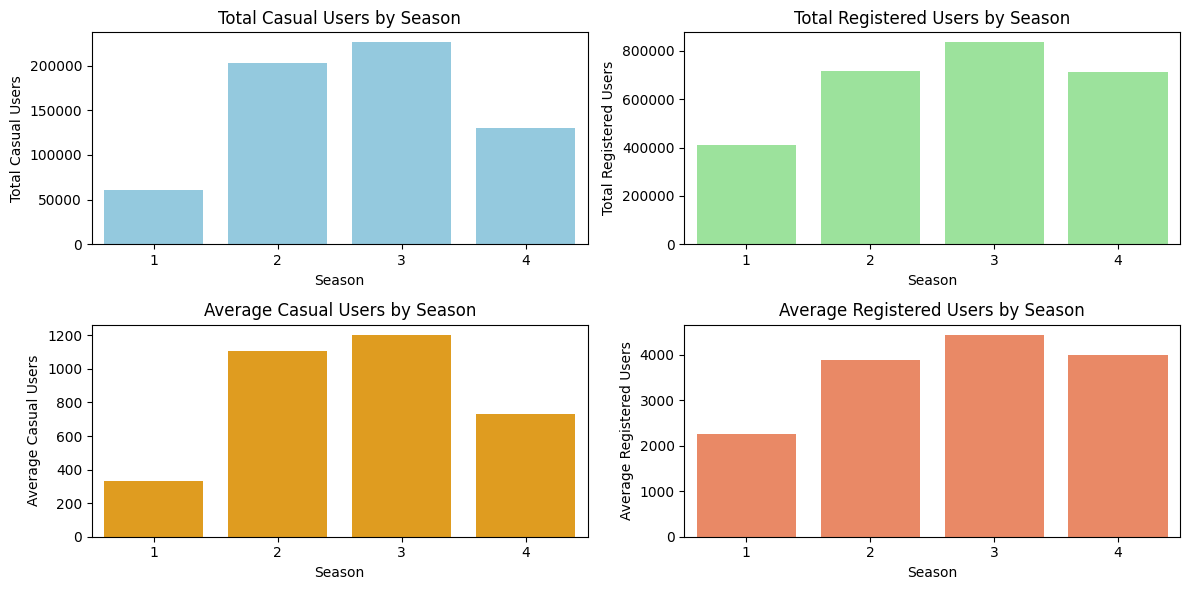

In [36]:
agg_data = day_df.groupby("season").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

plt.figure(figsize=(12, 6))

# Bar plot untuk casual sum
plt.subplot(2, 2, 1)
sns.barplot(x=agg_data.index, y=agg_data["casual"]["sum"], color='skyblue')
plt.xlabel("Season")
plt.ylabel("Total Casual Users")
plt.title("Total Casual Users by Season")

# Bar plot untuk registered sum
plt.subplot(2, 2, 2)
sns.barplot(x=agg_data.index, y=agg_data["registered"]["sum"], color='lightgreen')
plt.xlabel("Season")
plt.ylabel("Total Registered Users")
plt.title("Total Registered Users by Season")

# Bar plot untuk casual mean
plt.subplot(2, 2, 3)
sns.barplot(x=agg_data.index, y=agg_data[("casual", "mean")], color='orange')
plt.xlabel("Season")
plt.ylabel("Average Casual Users")
plt.title("Average Casual Users by Season")

# Bar plot untuk registered mean
plt.subplot(2, 2, 4)
sns.barplot(x=agg_data.index, y=agg_data["registered"]["mean"], color='coral')
plt.xlabel("Season")
plt.ylabel("Average Registered Users")
plt.title("Average Registered Users by Season")

plt.tight_layout()
plt.show()

### **Insight:**
- Untuk data yang dibandingkan sedikit mudah dipahami jika divisualisasikan dengan bar plot

## Analisis Lanjutan (Opsional)

**Menghitung Recency (R) berdasarkan hari terakhir dalam dataset ***

 Mengukur seberapa baru transaksi terakhir terjadi. Digunakan untuk melihat pelanggan yang masih aktif.  Semakin dekat suatu transaksi dengan tanggal ini, semakin tinggi skor Recency-nya. Ini penting untuk memahami pola penggunaan sepeda secara terkini dan mengidentifikasi pelanggan yang masih aktif dibandingkan dengan yang sudah lama tidak menyewa.

In [37]:
# Menentukan hari terakhir dalam dataset
last_date = day_df["dteday"].max()
print("Hari terakhir dalam dataset:", last_date)


Hari terakhir dalam dataset: 2012-12-31 00:00:00


**Menghitung Frequency (F)**

Menghitung total penyewaan per bulan. Bulan dengan penyewaan tinggi menunjukkan periode sibuk, misalnya Mei–September. Bulan dengan jumlah penyewaan lebih tinggi menunjukkan periode dengan aktivitas yang lebih padat yang mungkin disebabkan oleh cuaca yang lebih mendukung aktivitas luar ruangan. Dengan memahami pola ini, strategi promosi atau penyesuaian jumlah sepeda dapat dilakukan untuk bulan-bulan dengan permintaan tinggi.

In [38]:
# Menghitung jumlah total penyewaan sepeda per bulan
frequency_month = day_df.groupby("mnth")["cnt"].sum().reset_index()

# Menampilkan hasil
print(frequency_month)

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


**Menghitung Monetary (M)**

Mengukur total penyewaan per musim. Musim panas memiliki penyewaan tertinggi, sedangkan musim dingin terendah. Musim dengan angka penyewaan tertinggi menunjukkan waktu di mana layanan ini paling menguntungkan. Sebaliknya, musim dingin memiliki jumlah penyewaan paling rendah, yang mungkin disebabkan oleh cuaca yang kurang mendukung.

In [39]:
# Menghitung total penyewaan sepeda per musim
monetary_season = day_df.groupby("season")["cnt"].sum().reset_index()

# Menampilkan hasil
print(monetary_season)


   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


## Conclusion

- Conclution pertanyaan 1 : Cuaca yang lebih cerah, sedikit berawan, atau sebagian berawan meningkatkan jumlah penyewaan sepeda, baik pada data harian maupun per jam. Sebaliknya, kondisi cuaca buruk seperti hujan dan salju secara signifikan mengurangi jumlah penyewaan sepeda.

- Conclution pertanyaan 2 : Hari kerja cenderung memiliki jumlah penyewaan sepeda lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk aktivitas rutin, seperti bekerja atau berangkat ke sekolah/kampus.

- Conclution pertanyaan 3 : Hari dengan Penyewaan Sepeda Terbanyak Dari tujuh hari dalam seminggu, hari Jumat adalah hari dengan jumlah penyewaan sepeda tertinggi. Ini bisa disebabkan oleh meningkatnya aktivitas sebelum akhir pekan, di mana banyak orang lebih aktif dalam mobilitas mereka.

- Conclution pertanyaan 4 : Pengaruh Musim terhadap Penyewaan Sepeda
Musim fall/guggur memiliki jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya untuk kedua kategori pengguna (casual dan registered). Kemungkinan besar, suhu yang lebih nyaman dan kondisi cuaca yang lebih stabil di musim gugur berkontribusi terhadap peningkatan jumlah pengguna sepeda.

- Conclution dari analisis tambahan : Bulan Agustus adalah bulan dengan penyewaan tertinggi, sementara Januari memiliki penyewaan terendah.